In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Flight_Booking.csv to Flight_Booking.csv


In [3]:
df = pd.read_csv("/content/Flight_Booking.csv")  # you already uploaded this
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
print(df.shape)
print(df.info())
print(df.describe())


(300153, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB
None
          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean

In [5]:
print("Missing Values:/n ", df.isnull().sum())
df = df.dropna()

Missing Values:/n  Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


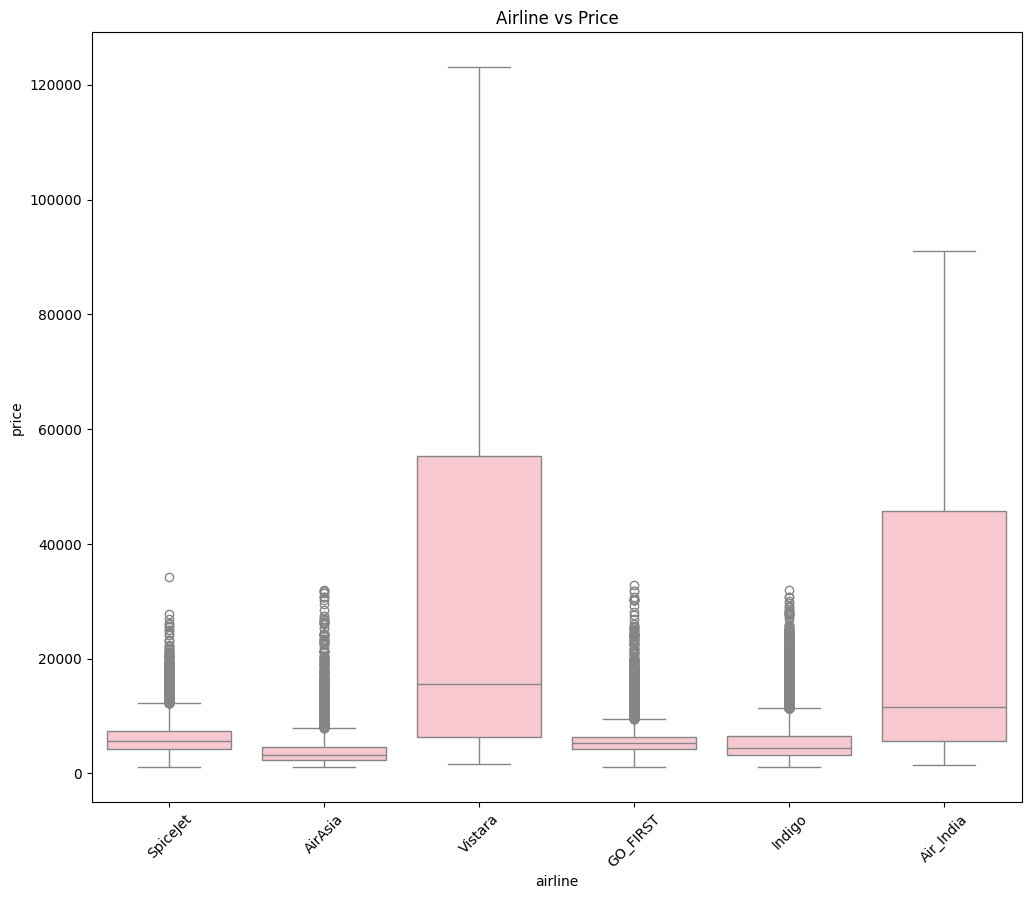

In [17]:
#air line and vs prices
# Airline vs Price
plt.figure(figsize=(12,10))
sns.boxplot(x='airline', y='price', data=df , color = "pink")
plt.xticks(rotation=45)
plt.title("Airline vs Price")
plt.show()




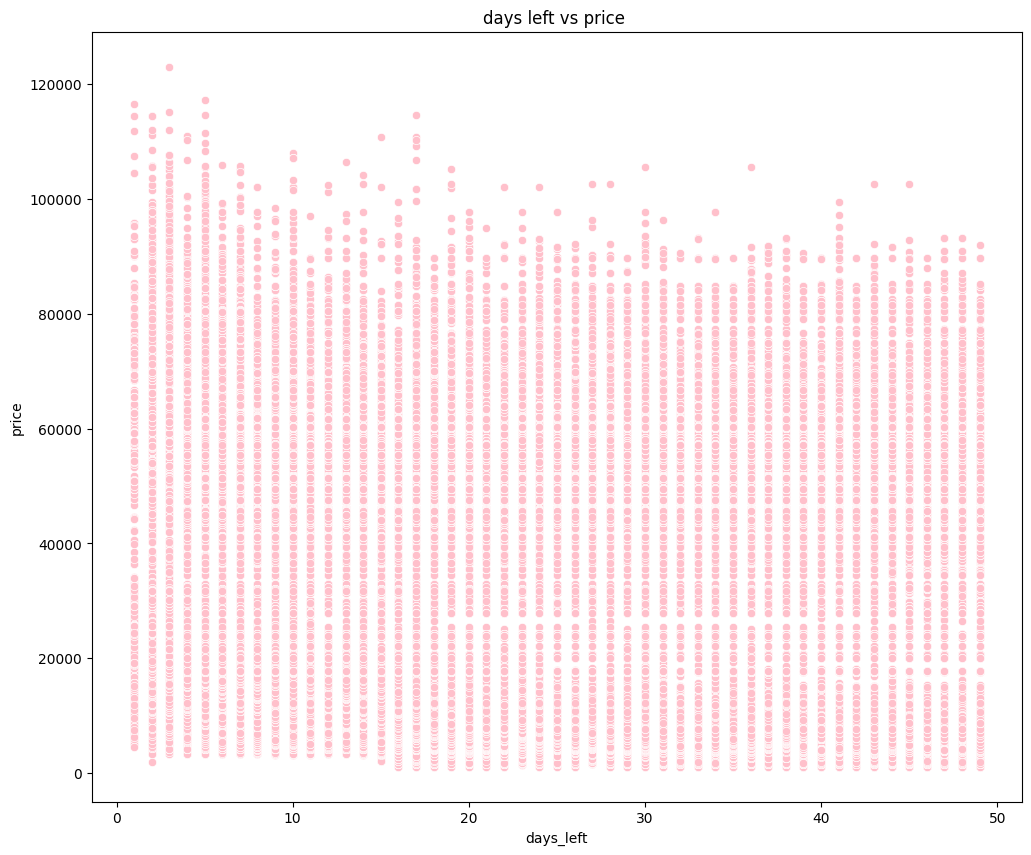

In [18]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='days_left', y='price', data=df, color = "pink")
plt.title("days left vs price ")
plt.show()

In [28]:
categorical_cols = ['airline', 'source_city', 'departure_time',
                    'destination_city', 'arrival_time', 'class']

ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

X = df.drop(['price', 'flight'], axis=1)  # Flight ID is not useful
y = df['price']

X = ct.fit_transform(X)


In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [29]:
for col in df.columns:
    print(f"{col}: {df[col].unique()[:10]}")



Unnamed: 0: [0 1 2 3 4 5 6 7 8 9]
airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
flight: ['SG-8709' 'SG-8157' 'I5-764' 'UK-995' 'UK-963' 'UK-945' 'UK-927' 'UK-951'
 'G8-334' 'G8-336']
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
stops: [ 0.  1. nan]
arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
class: ['Economy' 'Business']
duration: [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75]
days_left: [ 1  2  3  4  5  6  7  8  9 10]
price: [5953 5956 5955 6060 5954 5949 6165 6690 6585 8869]


In [24]:
df.columns = df.columns.str.strip()  # remove any leading/trailing spaces


In [26]:
print(df.columns)


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


In [27]:
# Map the text to numeric values
df['stops'] = df['stops'].map({
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4
})


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
print(pd.DataFrame(X_train).isnull().sum())


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27    10665
28        0
29        0
dtype: int64


In [38]:
# Combine X_train and y_train back into DataFrame to drop rows safely
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train.reset_index(drop=True)

# Drop rows with any NaNs
train_df = train_df.dropna()

# Split again
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']


In [39]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'/'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
MAE: 4564.5874375063195
RMSE: 6771.953906167552
R2 Score: 0.9110360102399704


In [41]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest:
MAE: 1032.326711032633
RMSE: 2644.309560921968
R2 Score: 0.9864352793247911


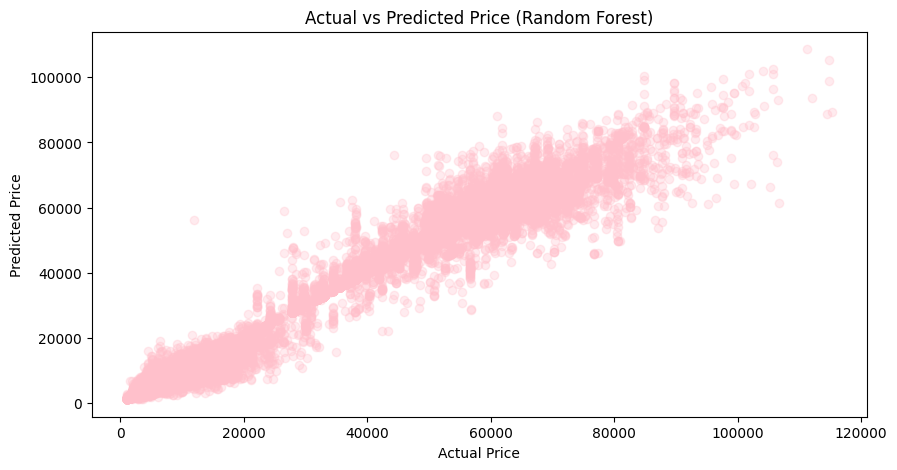

In [47]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.3, color = "pink")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Random Forest)")
plt.show()
